# RTK GPS Data Analysis

In [3]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

openSpace_rtk = bagreader('/home/tirth/catkin_ws/src/gps_driver/bagfiles/open_rtk_2024-02-09-20-00-50.bag')
occluded_rtk = bagreader('/home/tirth/catkin_ws/src/gps_driver/bagfiles/occluded_rtk_2024-02-09-20-25-30.bag')
walking_rtk = bagreader('/home/tirth/catkin_ws/src/gps_driver/bagfiles/walking_rtk_2024-02-09-20-53-22.bag')

[INFO]  Successfully created the data folder /home/tirth/catkin_ws/src/gps_driver/bagfiles/open_rtk_2024-02-09-20-00-50.
[INFO]  Successfully created the data folder /home/tirth/catkin_ws/src/gps_driver/bagfiles/occluded_rtk_2024-02-09-20-25-30.
[INFO]  Successfully created the data folder /home/tirth/catkin_ws/src/gps_driver/bagfiles/walking_rtk_2024-02-09-20-53-22.


In [4]:
openSpace_rtk.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gps_driver/Customrtk,239,0.796638


In [5]:

occluded_rtk.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gps_driver/Customrtk,296,0.995727


In [6]:
walking_rtk.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gps_driver/Customrtk,66,0.918184


In [7]:
openSpace_rtk_msg = openSpace_rtk.message_by_topic('/gps')
print("File saved: {}".format(openSpace_rtk_msg))

File saved: /home/tirth/catkin_ws/src/gps_driver/bagfiles/open_rtk_2024-02-09-20-00-50/gps.csv


In [8]:
occluded_rtk_msg = openSpace_rtk.message_by_topic('/gps')
print("File saved: {}".format(occluded_rtk_msg))

File saved: /home/tirth/catkin_ws/src/gps_driver/bagfiles/open_rtk_2024-02-09-20-00-50/gps.csv


In [9]:
walking_rtk_msg = openSpace_rtk.message_by_topic('/gps')
print("File saved: {}".format(walking_rtk_msg))

File saved: /home/tirth/catkin_ws/src/gps_driver/bagfiles/open_rtk_2024-02-09-20-00-50/gps.csv


### Extracting data from .bag file to CSV for plotting

In [10]:
openSpace_rtk_data = pd.read_csv(openSpace_rtk_msg)
openSpace_rtk_data.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,latitude,longitude,altitude,utm_easting,utm_northing,zone,letter,hdop,fix_quality,gpgga_read
0,1.707527e+09,1,1707515421,139034032,GPS1_Frame,42.338246,-71.086506,24.800,328115.066499,4.689441e+06,19,T,0.8,5,"$GNGGA,165021.00,4220.2947810,N,07105.1903710,..."
1,1.707527e+09,2,1707515422,392606735,GPS1_Frame,42.338246,-71.086506,24.661,328115.060271,4.689441e+06,19,T,0.8,5,"$GNGGA,165022.00,4220.2947799,N,07105.1903755,..."
2,1.707527e+09,3,1707515423,648386955,GPS1_Frame,42.338246,-71.086506,24.513,328115.055935,4.689441e+06,19,T,0.8,5,"$GNGGA,165023.00,4220.2947721,N,07105.1903784,..."
3,1.707527e+09,4,1707515424,903823375,GPS1_Frame,42.338246,-71.086506,24.176,328115.048087,4.689441e+06,19,T,0.8,5,"$GNGGA,165024.00,4220.2947535,N,07105.1903835,..."
4,1.707527e+09,5,1707515425,158767461,GPS1_Frame,42.338246,-71.086506,24.053,328115.040290,4.689441e+06,19,T,0.8,5,"$GNGGA,165025.00,4220.2947481,N,07105.1903890,..."


In [11]:
occluded_rtk_data = pd.read_csv(occluded_rtk_msg)
occluded_rtk_data.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,latitude,longitude,altitude,utm_easting,utm_northing,zone,letter,hdop,fix_quality,gpgga_read
0,1.707527e+09,1,1707515421,139034032,GPS1_Frame,42.338246,-71.086506,24.800,328115.066499,4.689441e+06,19,T,0.8,5,"$GNGGA,165021.00,4220.2947810,N,07105.1903710,..."
1,1.707527e+09,2,1707515422,392606735,GPS1_Frame,42.338246,-71.086506,24.661,328115.060271,4.689441e+06,19,T,0.8,5,"$GNGGA,165022.00,4220.2947799,N,07105.1903755,..."
2,1.707527e+09,3,1707515423,648386955,GPS1_Frame,42.338246,-71.086506,24.513,328115.055935,4.689441e+06,19,T,0.8,5,"$GNGGA,165023.00,4220.2947721,N,07105.1903784,..."
3,1.707527e+09,4,1707515424,903823375,GPS1_Frame,42.338246,-71.086506,24.176,328115.048087,4.689441e+06,19,T,0.8,5,"$GNGGA,165024.00,4220.2947535,N,07105.1903835,..."
4,1.707527e+09,5,1707515425,158767461,GPS1_Frame,42.338246,-71.086506,24.053,328115.040290,4.689441e+06,19,T,0.8,5,"$GNGGA,165025.00,4220.2947481,N,07105.1903890,..."


In [12]:
walking_rtk_data = pd.read_csv(walking_rtk_msg)
walking_rtk_data.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,latitude,longitude,altitude,utm_easting,utm_northing,zone,letter,hdop,fix_quality,gpgga_read
0,1.707527e+09,1,1707515421,139034032,GPS1_Frame,42.338246,-71.086506,24.800,328115.066499,4.689441e+06,19,T,0.8,5,"$GNGGA,165021.00,4220.2947810,N,07105.1903710,..."
1,1.707527e+09,2,1707515422,392606735,GPS1_Frame,42.338246,-71.086506,24.661,328115.060271,4.689441e+06,19,T,0.8,5,"$GNGGA,165022.00,4220.2947799,N,07105.1903755,..."
2,1.707527e+09,3,1707515423,648386955,GPS1_Frame,42.338246,-71.086506,24.513,328115.055935,4.689441e+06,19,T,0.8,5,"$GNGGA,165023.00,4220.2947721,N,07105.1903784,..."
3,1.707527e+09,4,1707515424,903823375,GPS1_Frame,42.338246,-71.086506,24.176,328115.048087,4.689441e+06,19,T,0.8,5,"$GNGGA,165024.00,4220.2947535,N,07105.1903835,..."
4,1.707527e+09,5,1707515425,158767461,GPS1_Frame,42.338246,-71.086506,24.053,328115.040290,4.689441e+06,19,T,0.8,5,"$GNGGA,165025.00,4220.2947481,N,07105.1903890,..."



###  Stationary northing vs. easting scatterplots. You may choose to plot open and occluded on same fig with different markers or plot as subplots.
    - Plot after subtracting the centroid from each data point
    - Indicate the total offset in easting and northing somewhere on the plot or in text

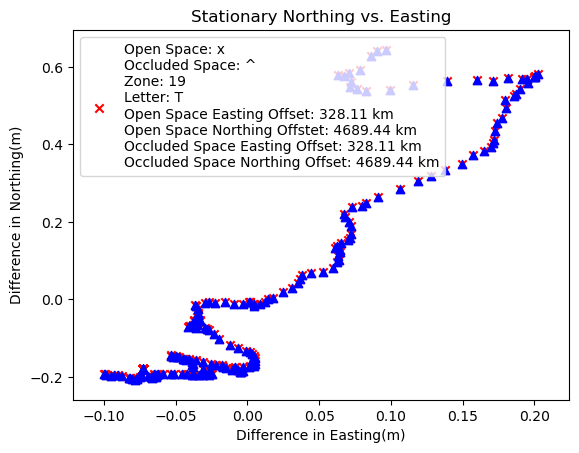

In [26]:
centroid_easting_open = openSpace_rtk_data['utm_easting'].mean()
centroid_northing_open = openSpace_rtk_data['utm_northing'].mean()

centroid_easting_occluded = occluded_rtk_data['utm_easting'].mean()
centroid_northing_occluded = occluded_rtk_data['utm_northing'].mean()

plt.scatter(openSpace_rtk_data['utm_easting']-centroid_easting_open, openSpace_rtk_data['utm_northing']-centroid_northing_open, label='stationary open space', color='red', marker='x')
plt.scatter(occluded_rtk_data['utm_easting']-centroid_easting_occluded, occluded_rtk_data['utm_northing']-centroid_northing_occluded, label='stationary occluded space', color='blue', marker='^')

plt.xlabel('Difference in Easting(m)')
plt.ylabel('Difference in Northing(m)')
plt.title('Stationary Northing vs. Easting')

legend_text = f'Open Space: x\nOccluded Space: ^\nZone: {openSpace_rtk_data.iloc[1]["zone"]}\nLetter: {openSpace_rtk_data.iloc[1]["letter"]}\nOpen Space Easting Offset: {centroid_easting_open/1000:.2f} km\nOpen Space Northing Offstet: {centroid_northing_open/1000:.2f} km\nOccluded Space Easting Offset: {centroid_easting_occluded/1000:.2f} km\nOccluded Space Northing Offset: {centroid_northing_occluded/1000:.2f} km'

plt.legend([legend_text])
plt.savefig('openSpace_rtk.png')
plt.show()



### Stationary altitude vs. time plot. You may choose to plot open and occluded on same fig with different markers or plot as subplots.

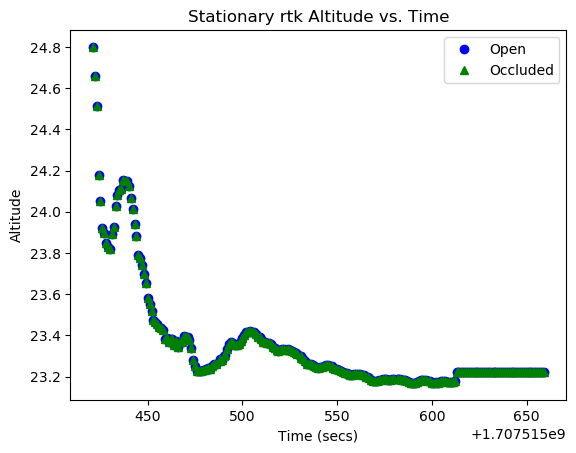

In [28]:
arr1 = openSpace_rtk_data['header.stamp.secs'].to_numpy()
arr2 = occluded_rtk_data['header.stamp.secs'].to_numpy()
alt_open = openSpace_rtk_data['altitude'].to_numpy()
alt_occluded = occluded_rtk_data['altitude'].to_numpy()

plt.plot(arr1, alt_open, label='Open', marker='o', linestyle='', color='blue')
plt.plot(arr2, alt_occluded, label='Occluded', marker='^', linestyle='', color='green')

plt.xlabel('Time (secs)')
plt.ylabel('Altitude')
plt.title('Stationary rtk Altitude vs. Time')

plt.legend()

plt.savefig('stationary_alt_time_rtk.png')
plt.show()

### Stationary histogram plots for position from the centroid (you may neglect altitude) for open and occluded datasets, on two subplots.
    - Calculate the Euclidean distance in easting and northing from each point to your centroid and plot these values in 1D histograms 

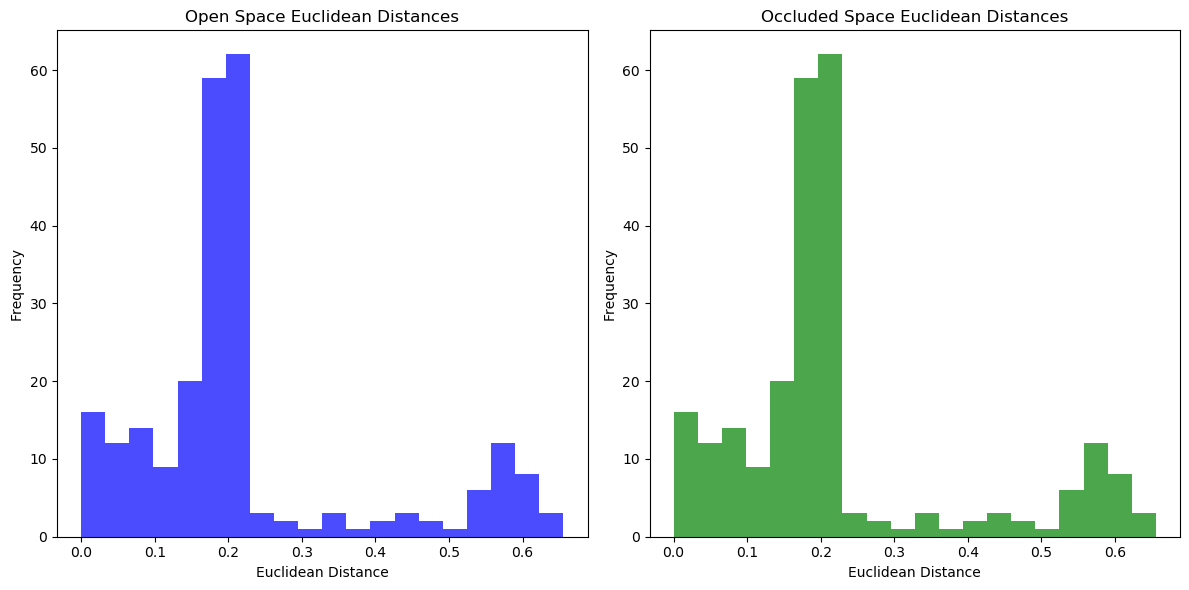

In [30]:
from sklearn.metrics import euclidean_distances

centroid_openSpace = np.array([centroid_easting_open, centroid_northing_open])
centroid_occludedSpace = np.array([centroid_easting_occluded, centroid_northing_occluded])

# Extracting position data
openSpace_positions = openSpace_rtk_data[['utm_easting','utm_northing']].values
occludedSpace_positions = occluded_rtk_data[['utm_easting','utm_northing']].values

# Calculating Euclidean distances to the centroids
openSpace_distances = euclidean_distances(openSpace_positions,[centroid_openSpace])
occludedSpace_distances = euclidean_distances(occludedSpace_positions, [centroid_occludedSpace])

plt.figure(figsize=(12,6))

#Histogram for open space
plt.subplot(1,2,1)
plt.hist(openSpace_distances, bins=20, color='blue', alpha=0.7)
plt.title('Open Space Euclidean Distances')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')

#Histogram for occluded space
plt.subplot(1,2,2)
plt.hist(occludedSpace_distances, bins=20, color='green', alpha=0.7)

plt.title('Occluded Space Euclidean Distances')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


### Moving (walking) data northing vs. easting scatterplot with line of best fit.

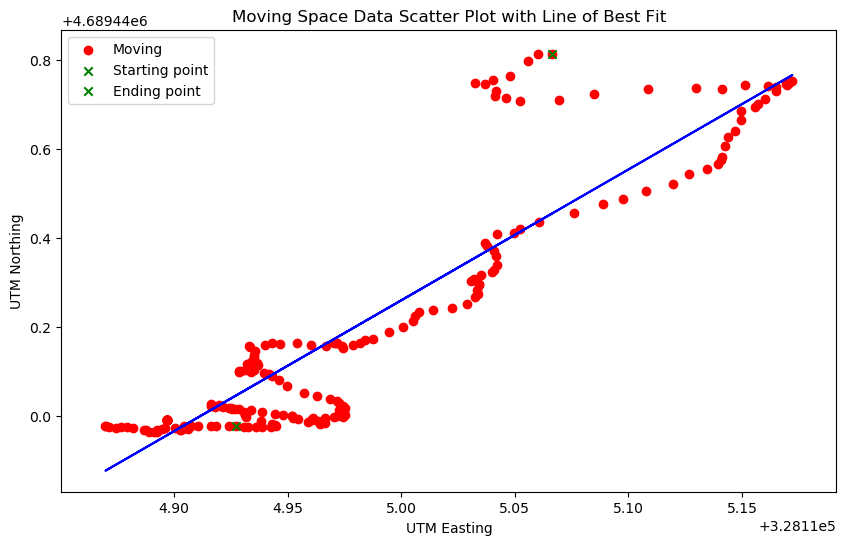

In [32]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,6))
arr1=walking_rtk_data['utm_easting'].to_numpy().reshape(-1,1)
arr2=walking_rtk_data['utm_northing'].to_numpy().reshape(-1,1)

plt.scatter(arr1, arr2, label='Moving', marker='o', color='red')
plt.scatter(arr1[0],arr2[0],label='Starting point',marker='x', color='green')
plt.scatter(arr1[161], arr2[161], label='Ending point', marker='x', color='green')
# Fit a linear regression model for Moving data
reg_moving = LinearRegression().fit(arr1,arr2)
plt.plot(arr1, reg_moving.predict(arr1), color='blue')

plt.title('Moving Space Data Scatter Plot with Line of Best Fit')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')
plt.legend()
plt.savefig('walking_north_east.png')
plt.show()



### Moving (walking) data altitude vs. time plot.

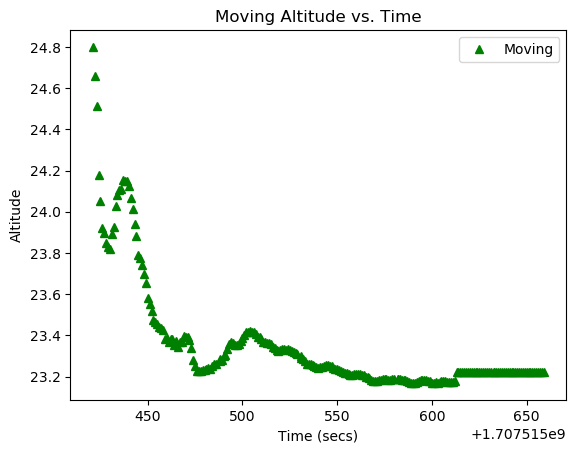

In [35]:
walking_time = walking_rtk_data['header.stamp.secs'].to_numpy()
walking_alt = walking_rtk_data['altitude'].to_numpy()

plt.plot(walking_time, walking_alt, label="Moving", marker='^', linestyle='', color='green')


plt.xlabel('Time (secs)')
plt.ylabel('Altitude')
plt.title('Moving Altitude vs. Time')

plt.legend()

plt.savefig('walking_alt_time.png')
plt.show()
